In [65]:
# Run this if you get an ImportError below
!pip install bravado

In [28]:
#KLIFS
from bravado.client import SwaggerClient
KLIFS_API_DEFINITIONS = "http://klifs.vu-compmedchem.nl/swagger/swagger.json"
KLIFS_CLIENT = SwaggerClient.from_url(KLIFS_API_DEFINITIONS, config={'validate_responses': False})

In [29]:
def _all_kinase_families():
    return KLIFS_CLIENT.Information.get_kinase_families().response().result
KLIFS_CLIENT.Information.get_kinase_families().response().result

['A6',
 'ABC1',
 'AKT',
 'ALK',
 'AUR',
 'Abl',
 'Ack',
 'Akt',
 'Alk',
 'Alpha',
 'Aur',
 'Axl',
 'BCR',
 'BRD',
 'BUB',
 'Bud32',
 'CAMK-Unique',
 'CAMK1',
 'CAMK2',
 'CAMKK',
 'CAMKL',
 'CASK',
 'CCK4',
 'CDC7',
 'CDK',
 'CDKL',
 'CK1',
 'CK2',
 'CLK',
 'Csk',
 'DAPK',
 'DCAMKL',
 'DDR',
 'DMPK',
 'DYRK',
 'EGFR',
 'Eph',
 'FAK',
 'FAST',
 'FGFR',
 'Fer',
 'G11',
 'GRK',
 'GSK',
 'H11',
 'Haspin',
 'IKK',
 'IRAK',
 'IRE',
 'InsR',
 'JakA',
 'JakB',
 'KIS',
 'LISK',
 'LRRK',
 'Lmr',
 'MAPK',
 'MAPKAPK',
 'MAST',
 'MLCK',
 'MLK',
 'MOS',
 'Met',
 'Musk',
 'NAK',
 'NDR',
 'NEK',
 'NKF1',
 'NKF2',
 'NKF3',
 'NKF4',
 'NKF5',
 'NRBP',
 'Other-Unique',
 'PAN3',
 'PDGFR',
 'PDHK',
 'PDK1',
 'PEK',
 'PHK',
 'PIK',
 'PIKK',
 'PIM',
 'PIP',
 'PIPK',
 'PKA',
 'PKC',
 'PKD',
 'PKG',
 'PKN',
 'PLK',
 'PSK',
 'RAD53',
 'RAF',
 'RCK',
 'RGC',
 'RIO',
 'RIPK',
 'RSK',
 'RSKL',
 'RSKR',
 'RSKb',
 'Ret',
 'Ror',
 'Ryk',
 'SCY1',
 'SGK',
 'SRPK',
 'STE-Unique',
 'STE11',
 'STE20',
 'STE7',
 'STKR',
 'S

In [30]:
def _kinases_from_family(family, species="HUMAN"):
    return KLIFS_CLIENT.Information.get_kinase_names(kinase_family=family, species=species).response().result
    print (KLIFS_CLIENT.Information.get_kinase_names(kinase_family=family, species=species).response().result
) 

In [31]:
def _protein_and_ligand_structure(*kinase_ids):
    structures = KLIFS_CLIENT.Structures.get_structures_list(kinase_ID=kinase_ids).response().result
    molcomplex = KLIFS_CLIENT.Structures.get_structure_get_pdb_complex(structure_ID=structures[0].structure_ID).response().result
    protein = KLIFS_CLIENT.Structures.get_structure_get_protein(structure_ID=structures[0].structure_ID).response().result
    ligands = KLIFS_CLIENT.Ligands.get_ligands_list(kinase_ID=kinase_ids).response().result
    return molcomplex, protein, [ligand.SMILES for ligand in ligands]
    print (molcomplex)
    protein
    [ligand.SMILES for ligand in ligands]


In [34]:
import random
import time
def step_01_random():
    # Get a random kinase from a random family
    attempts = 20
    families = _all_kinase_families()
    while attempts:  # some kinase IDs cannot be found in the structure list...
        family = random.choice(families)
        kinase = random.choice(_kinases_from_family(family))
        try:
            molcomplex, protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
            return molcomplex, protein, ligands
        protein
        #print('molcomplex')
        else:                   
            print("Chosen", kinase.name, "kinase with ID", kinase.kinase_ID, "from family", family)
            
    print("Could not find a valid kinase. Try again!")
    return None, None, None
    


SyntaxError: invalid syntax (<ipython-input-34-29125f0191af>, line 18)

In [35]:
import random
import time
def step_01_random():
    # Get a random kinase from a random family
    attempts = 20
    families = _all_kinase_families()
    while attempts:  # some kinase IDs cannot be found in the structure list...
        family = random.choice(families)
        kinase = random.choice(_kinases_from_family(family))
        try:
            molcomplex, protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
        else:                   
            print("Chosen", kinase.name, "kinase with ID", kinase.kinase_ID, "from family", family)
            return molcomplex, protein, ligands
    print("Could not find a valid kinase. Try again!")
    return None, None, None

In [37]:
def step_01(family):
    """
    Given a kinase family name (check `_all_kinase_families()`), retrieve a random structure.
    """
    attempts = 20
    while attempts:  # some kinase IDs cannot be found in the structure list...
        kinase = random.choice(_kinases_from_family(family))
        try:
            molcomplex, protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
        else:                   
            print("Chosen", kinase.name, "kinase with ID", kinase.kinase_ID, "from family", family)
            return molcomplex, protein, ligands
    print("Could not find a valid kinase. Try again!")
    return None, None, None

In [38]:
molcomplex, protein, ligands = step_01_random()

Chosen TNK2 kinase with ID 394 from family Ack


In [39]:
molcomplex

'HEADER    3eqp.A                                                      \nREMARK  99                                                                      \nREMARK  99 MOE v2012.10 (Chemical Computing Group Inc.) Fri Mar  3 15:57:11 2017\nHELIX    1   1 PRO A  168  HIS A  182  1               Generated by MOE   15\nHELIX    2   2 LEU A  213  HIS A  220  1               Generated by MOE    8\nHELIX    3   3 GLN A  221  HIS A  223  5               Generated by MOE    3\nHELIX    4   4 LEU A  226  SER A  245  1               Generated by MOE   20\nHELIX    5   5 ALA A  255  ASN A  257  5               Generated by MOE    3\nHELIX    6   6 PHE A  294  TRP A  296  5               Generated by MOE    3\nHELIX    7   7 PRO A  299  THR A  304  1               Generated by MOE    6\nHELIX    8   8 HIS A  309  PHE A  324  1               Generated by MOE   16\nHELIX    9   9 GLY A  336  ASP A  344  1               Generated by MOE    9\nHELIX   10  10 GLN A  358  CYS A  367  1               Genera

In [41]:
molcomplex_split = [i.split('\t') for i in molcomplex[:-1].split('\n')]
molcomplex_split

[['HEADER    3eqp.A                                                      '],
 ['REMARK  99                                                                      '],
 ['REMARK  99 MOE v2012.10 (Chemical Computing Group Inc.) Fri Mar  3 15:57:11 2017'],
 ['HELIX    1   1 PRO A  168  HIS A  182  1               Generated by MOE   15'],
 ['HELIX    2   2 LEU A  213  HIS A  220  1               Generated by MOE    8'],
 ['HELIX    3   3 GLN A  221  HIS A  223  5               Generated by MOE    3'],
 ['HELIX    4   4 LEU A  226  SER A  245  1               Generated by MOE   20'],
 ['HELIX    5   5 ALA A  255  ASN A  257  5               Generated by MOE    3'],
 ['HELIX    6   6 PHE A  294  TRP A  296  5               Generated by MOE    3'],
 ['HELIX    7   7 PRO A  299  THR A  304  1               Generated by MOE    6'],
 ['HELIX    8   8 HIS A  309  PHE A  324  1               Generated by MOE   16'],
 ['HELIX    9   9 GLY A  336  ASP A  344  1               Generated by MOE    9'],
 [

In [42]:
protein

'@<TRIPOS>MOLECULE\n3eqp.A\n4308 4360 268 0 0 \nBIOPOLYMER\nUSER_CHARGES\n\n\n@<TRIPOS>ATOM\n   1 N        4.1653    38.2501    37.6098 N.4     1 LEU117   1.0000 BACKBONE\n   2 H1       5.0759    38.3452    37.1832 H       1 LEU117   0.0000 BACKBONE\n   3 H2       3.6878    39.1398    37.5860 H       1 LEU117   0.0000 BACKBONE\n   4 H3       3.6253    37.5645    37.1014 H       1 LEU117   0.0000 BACKBONE\n   5 CA       4.3230    37.8091    39.0231 C.3     1 LEU117   0.0000 BACKBONE\n   6 HA       4.8840    38.5791    39.5526 H       1 LEU117   0.0000 BACKBONE\n   7 C        5.1916    36.5108    39.1785 C.2     1 LEU117   0.0000 BACKBONE\n   8 O        4.9682    35.7266    40.1035 O.2     1 LEU117   0.0000 BACKBONE\n   9 CB       2.9226    37.6638    39.6761 C.3     1 LEU117   0.0000 \n  10 HB2      3.0956    37.2277    40.6599 H       1 LEU117   0.0000 \n  11 HB3      2.3757    36.9542    39.0552 H       1 LEU117   0.0000 \n  12 CG       1.9612    38.8579    39.9039 C.3     1 LEU117   

In [43]:
protein_split = [i.split('\t') for i in protein[:-1].split('\n')]
protein_split

[['@<TRIPOS>MOLECULE'],
 ['3eqp.A'],
 ['4308 4360 268 0 0 '],
 ['BIOPOLYMER'],
 ['USER_CHARGES'],
 [''],
 [''],
 ['@<TRIPOS>ATOM'],
 ['   1 N        4.1653    38.2501    37.6098 N.4     1 LEU117   1.0000 BACKBONE'],
 ['   2 H1       5.0759    38.3452    37.1832 H       1 LEU117   0.0000 BACKBONE'],
 ['   3 H2       3.6878    39.1398    37.5860 H       1 LEU117   0.0000 BACKBONE'],
 ['   4 H3       3.6253    37.5645    37.1014 H       1 LEU117   0.0000 BACKBONE'],
 ['   5 CA       4.3230    37.8091    39.0231 C.3     1 LEU117   0.0000 BACKBONE'],
 ['   6 HA       4.8840    38.5791    39.5526 H       1 LEU117   0.0000 BACKBONE'],
 ['   7 C        5.1916    36.5108    39.1785 C.2     1 LEU117   0.0000 BACKBONE'],
 ['   8 O        4.9682    35.7266    40.1035 O.2     1 LEU117   0.0000 BACKBONE'],
 ['   9 CB       2.9226    37.6638    39.6761 C.3     1 LEU117   0.0000 '],
 ['  10 HB2      3.0956    37.2277    40.6599 H       1 LEU117   0.0000 '],
 ['  11 HB3      2.3757    36.9542    39.055

In [44]:
ligands

['O=C\\1NC(=N/C1=C/2\\C3=C(NC=C3)C(=O)NCC2)N',
 'P(=O)(OP(=O)(O)CP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](O)[C@@H]1O)O',
 'O(C(CCN1N=C(Nc2c(cccc2C)C)c3c1nc(nc3)Nc4ccc(N5CCNCC5)cc4)(C)C)C',
 'O(c1ccc(cc1)C=2N=C(N3C2C(=NC=C3)N)C4CC(O)C4)c5ccccc5',
 'O=C(Nc1c(cccc1C)C)c2c(Oc3c(OCC)cccc3)nc(nc2)Nc4ccc(N5CCN(CCO)CC5)cc4',
 'S1C(SCC1)CNc2ncnc3NC(c4ccc(OCCN(C)C)cc4)=C(c32)c5ccccc5',
 'FC(F)(F)c1cc(ccc1)C(=O)Nc2cc(N3C(=O)N(c4nc(ncc4C3)Nc5cnc(N6CCN(C(=O)C)CC6)cc5)C)c(cc2)C']

In [45]:
import nglview as nv
from tempfile import NamedTemporaryFile
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage #Needed to show molecules

_ColormakerRegistry()

In [54]:
def preview_molecule_contents(contents):
    # This is a temporary file, it will be autodeleted
    with NamedTemporaryFile('w+', suffix='.mol2') as f:
        f.write(protein)
        v = nv.show_file(f.name)
    return v


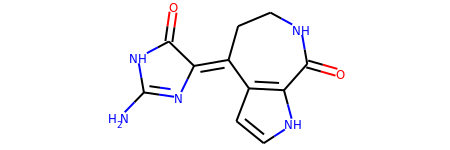

In [52]:
def preview_smiles(smiles):
    print(smiles)
    return Chem.MolFromSmiles(ligands[0])
Chem.MolFromSmiles(ligands[0])


In [62]:
def multi_preview_smiles(*smiles):
    legends = [f"{s[:30]}..." for s in smiles]  # shorten the smiles string to avoid text overlap
    molecules = [Chem.MolFromSmiles(s) for s in smiles]
    return MolsToGridImage(molecules, molsPerRow=3, subImgSize=(300, 300), maxMols=len(rdkit_ligands),
                           legends=legends, useSVG=True)
#print(MolsToGridImage(molecules))


In [63]:
preview_molecule_contents(protein)


NGLWidget()

O=C\1NC(=N/C1=C/2\C3=C(NC=C3)C(=O)NCC2)N


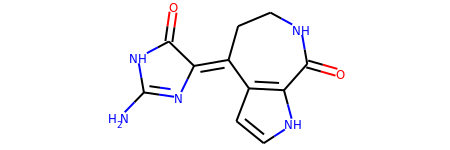

In [64]:
preview_smiles(ligands[0])

In [66]:
import requests
def similar_compounds_pubchem(smiles, threshold=75, n_records=10):
    # Query PubChem for similar compounds
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/{smiles}/JSON?Threshold={threshold}&MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()['Waiting']['ListKey']
    # Response is async, poll every second for 25 seconds to see if it's done
    attempts = 25
    while attempts:
        r = requests.get(f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/{key}/cids/JSON")
        r.raise_for_status()
        response = r.json()
        if 'IdentifierList' in response:
            cids = response['IdentifierList']['CID']
            break
        attempts -= 1
        time.sleep(1)
    else:
        raise IOError("Could not find matches for " + smiles)
    # We get the Compound IDs back, but we need the SMILES
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{','.join(map(str, cids))}/property/CanonicalSMILES/JSON"
    r = requests.get(url)
    r.raise_for_status()
    return [item['CanonicalSMILES'] for item in r.json()['PropertyTable']['Properties']]

In [67]:
def step_02(ligands):
    # Get the first ligand for the current kinase
    smiles = ligands[0]
    # Look for 10 most similar compounds on pubchem
    return similar_compounds_pubchem(smiles, n_records=10)


In [68]:
similar_smiles = step_02(ligands)
multi_preview_smiles(*similar_smiles)

HTTPError: 400 Client Error: PUGREST.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/O=C%5C1NC(=N/C1=C/2%5CC3=C(NC=C3)C(=O)NCC2)N/JSON?Threshold=75&MaxRecords=10

In [69]:
egfr_molcomplex, egfr_protein, egfr_ligands = step_01('EGFR')
similar_smiles_egfr = step_02(egfr_ligands)

Chosen ERBB2 kinase with ID 407 from family EGFR


In [70]:
preview_molecule_contents(egfr_protein)

NGLWidget()

Clc1c(Oc2cc(ccc2)C(F)(F)F)ncc(Nc3ncnc4c3N(C=C4)CCOCCO)c1


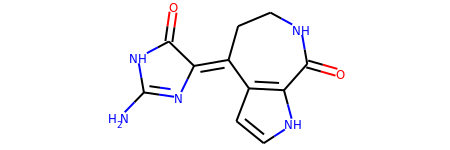

In [71]:
preview_smiles(egfr_ligands[0])

In [73]:
import os
os.makedirs('data', exist_ok=True)
with open('data/similar_smiles.txt', 'w') as f:
    f.write('\n'.join(similar_smiles_egfr))
similar_smiles_egfr

['COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4',
 'COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=NC=CC=N3)N4CCCC4CO)Cl',
 'CC1=CN=C(C(=C1OC)C)CN2C=NC3=C2N=C(N=C3Cl)N',
 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NN4C3=C(C(=C4)OCC(C)O)C',
 'CCC1=C(N2C=C(C=CC2=N1)Cl)C(=O)NCC3=CC=C(C=C3)N4CCC(CC4)C5=CC=C(C=C5)OC(F)(F)F',
 'CN1C2=C(C=C(C=C2)OC3=CC(=NC=C3)C4=NC=C(N4)C(F)(F)F)N=C1NC5=CC=C(C=C5)C(F)(F)F',
 'CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4=C(C(=CC=C4)Cl)F)OC',
 'CN1C=CC2=C1C(=NC=N2)OC3=CC(=C(C=C3)NC(=O)NC4=CC=CC(=C4)C(F)(F)F)F',
 'CC1=CN=C(C(=C1OC)C)CN2C=C(C3=C2N=C(N=C3Cl)N)C#CCC(C)(C)O',
 'CCCCC1=C(NC2=NC=CN=C12)C3=CC=C(C=C3)OC']

In [74]:
with open('data/protein.mol2', 'w') as f:
    f.write(egfr_protein)
egfr_protein

'@<TRIPOS>MOLECULE\n3pp0.A\n4634 4681 286 0 0 \nBIOPOLYMER\nUSER_CHARGES\n\n\n@<TRIPOS>ATOM\n   1 N       -2.1282    42.4597    23.2773 N.4     1 ALA706   1.0000 BACKBONE\n   2 H1      -1.4942    43.1162    22.8447 H       1 ALA706   0.0000 BACKBONE\n   3 H2      -3.0270    42.5078    22.8191 H       1 ALA706   0.0000 BACKBONE\n   4 H3      -1.7558    41.5249    23.1907 H       1 ALA706   0.0000 BACKBONE\n   5 CA      -2.2873    42.7999    24.7214 C.3     1 ALA706   0.0000 BACKBONE\n   6 HA      -2.7030    43.8057    24.7828 H       1 ALA706   0.0000 BACKBONE\n   7 C       -0.9408    42.7959    25.4458 C.2     1 ALA706   0.0000 BACKBONE\n   8 O       -0.1688    41.8406    25.2982 O.2     1 ALA706   0.0000 BACKBONE\n   9 CB      -3.2409    41.8204    25.3925 C.3     1 ALA706   0.0000 \n  10 HB1     -2.8284    40.8132    25.3330 H       1 ALA706   0.0000 \n  11 HB2     -4.2059    41.8483    24.8865 H       1 ALA706   0.0000 \n  12 HB3     -3.3708    42.0986    26.4383 H       1 ALA706   

In [77]:
egfr_protein_split = [i.split('\t') for i in egfr_protein[:-1].split('\n')]
egfr_protein_split

[['@<TRIPOS>MOLECULE'],
 ['3pp0.A'],
 ['4634 4681 286 0 0 '],
 ['BIOPOLYMER'],
 ['USER_CHARGES'],
 [''],
 [''],
 ['@<TRIPOS>ATOM'],
 ['   1 N       -2.1282    42.4597    23.2773 N.4     1 ALA706   1.0000 BACKBONE'],
 ['   2 H1      -1.4942    43.1162    22.8447 H       1 ALA706   0.0000 BACKBONE'],
 ['   3 H2      -3.0270    42.5078    22.8191 H       1 ALA706   0.0000 BACKBONE'],
 ['   4 H3      -1.7558    41.5249    23.1907 H       1 ALA706   0.0000 BACKBONE'],
 ['   5 CA      -2.2873    42.7999    24.7214 C.3     1 ALA706   0.0000 BACKBONE'],
 ['   6 HA      -2.7030    43.8057    24.7828 H       1 ALA706   0.0000 BACKBONE'],
 ['   7 C       -0.9408    42.7959    25.4458 C.2     1 ALA706   0.0000 BACKBONE'],
 ['   8 O       -0.1688    41.8406    25.2982 O.2     1 ALA706   0.0000 BACKBONE'],
 ['   9 CB      -3.2409    41.8204    25.3925 C.3     1 ALA706   0.0000 '],
 ['  10 HB1     -2.8284    40.8132    25.3330 H       1 ALA706   0.0000 '],
 ['  11 HB2     -4.2059    41.8483    24.886

In [75]:
with open('data/complex.pdb', 'w') as f:
    f.write(egfr_molcomplex)
egfr_molcomplex


'HEADER    3pp0.A                                                      \nREMARK  99                                                                      \nREMARK  99 MOE v2012.10 (Chemical Computing Group Inc.) Fri Mar  3 16:19:18 2017\nHELIX    1   1 GLU A  717  GLU A  719  5               Generated by MOE    3\nHELIX    2   2 PRO A  761  MET A  774  1               Generated by MOE   14\nHELIX    3   3 LEU A  806  GLU A  812  1               Generated by MOE    7\nHELIX    4   4 SER A  819  ASP A  838  1               Generated by MOE   20\nHELIX    5   5 ALA A  848  ASN A  850  5               Generated by MOE    3\nHELIX    6   6 ILE A  886  TRP A  888  5               Generated by MOE    3\nHELIX    7   7 LEU A  891  ARG A  896  1               Generated by MOE    6\nHELIX    8   8 HIS A  901  MET A  916  1               Generated by MOE   16\nHELIX    9   9 ALA A  928  GLU A  930  5               Generated by MOE    3\nHELIX   10  10 ILE A  931  GLU A  936  1               Genera

In [79]:
egfr_molcomplex_split = [i.split('\t') for i in egfr_molcomplex[:-1].split('\n')]
egfr_molcomplex_split

[['HEADER    3pp0.A                                                      '],
 ['REMARK  99                                                                      '],
 ['REMARK  99 MOE v2012.10 (Chemical Computing Group Inc.) Fri Mar  3 16:19:18 2017'],
 ['HELIX    1   1 GLU A  717  GLU A  719  5               Generated by MOE    3'],
 ['HELIX    2   2 PRO A  761  MET A  774  1               Generated by MOE   14'],
 ['HELIX    3   3 LEU A  806  GLU A  812  1               Generated by MOE    7'],
 ['HELIX    4   4 SER A  819  ASP A  838  1               Generated by MOE   20'],
 ['HELIX    5   5 ALA A  848  ASN A  850  5               Generated by MOE    3'],
 ['HELIX    6   6 ILE A  886  TRP A  888  5               Generated by MOE    3'],
 ['HELIX    7   7 LEU A  891  ARG A  896  1               Generated by MOE    6'],
 ['HELIX    8   8 HIS A  901  MET A  916  1               Generated by MOE   16'],
 ['HELIX    9   9 ALA A  928  GLU A  930  5               Generated by MOE    3'],
 [

In [80]:
!pip install nglview
!nglview install
!nglview enable

Installing /home/abishek/anaconda3/lib/python3.7/site-packages/nglview/static -> nglview-js-widgets
Removing: /home/abishek/anaconda3/share/jupyter/nbextensions/nglview-js-widgets
Making directory: /home/abishek/anaconda3/share/jupyter/nbextensions/nglview-js-widgets/
Copying: /home/abishek/anaconda3/lib/python3.7/site-packages/nglview/static/extension.js -> /home/abishek/anaconda3/share/jupyter/nbextensions/nglview-js-widgets/extension.js
Copying: /home/abishek/anaconda3/lib/python3.7/site-packages/nglview/static/a4c733ec4baef9ad3896d4e34a8a5448.png -> /home/abishek/anaconda3/share/jupyter/nbextensions/nglview-js-widgets/a4c733ec4baef9ad3896d4e34a8a5448.png
Copying: /home/abishek/anaconda3/lib/python3.7/site-packages/nglview/static/index.js.map -> /home/abishek/anaconda3/share/jupyter/nbextensions/nglview-js-widgets/index.js.map
Copying: /home/abishek/anaconda3/lib/python3.7/site-packages/nglview/static/971364734f3b603e5d363a2634898b42.png -> /home/abishek/anaconda3/share/jupyter/nbex

Enabling notebook extension nglview-js-widgets/extension...
      - Validating: OK


In [81]:
import pandas as pd
import time
import nglview as nv
from ipywidgets import AppLayout, Layout, Select

In [86]:
def split_pdbqt(path):
    """
    Split a multimodel PDBQT into separate files.
    """
    files = []
    with open(path) as f:
        lines = []
        i = 0
        for line in f:
            lines.append(line)
            if line.strip() == 'ENDMDL':
                fn = f'data/results.{i}.pdbqt'
                with open(fn, 'w') as o:
                    o.write(''.join(lines))
                files.append(fn)
                i += 1
                lines = []
    return files
    #print(files)

NameError: name 'files' is not defined

In [87]:
def parse_output(out):
    """
    Create a DataFrame out of the Vina output file
    """
    with open(out) as f:
        data = []
        for line in f:
            if line.startswith('-----+'):
                line = next(f)
                while line.split()[0].isdigit():
                    index, *floats = line.split()
                    data.append([int(index)] + list(map(float, floats)))
                    line = next(f)
    return pd.DataFrame.from_records(data, 
                                     columns=['Mode', 'Affinity (kcal/mol)', 'RMSD (l.b.)', 'RMSD (u.b.)'], 
                                     exclude=['Mode'])

In [98]:
def create_viewer(protein, ligands, affinities):
    """
    Create a nglview widget with the protein and all the ligands labeled by affinities
    """
    v = nv.show_file(protein)
    label_kwargs = dict(labelType="text", sele="@0", showBackground=True, backgroundColor="black")
    for ligand, affinity in zip(ligands, affinities):
        c = v.add_component(ligand)
        c.add_label(labelText=[str(affinity)], **label_kwargs)
    return v

In [116]:
def show_docking(protein, ligands, vina_output):
    # Split the multi PDBQT ligand file into separate files
    ligands_files = split_pdbqt(ligands)
    # Retrieve affinities
    affinities = parse_output(vina_output)['Affinity (kcal/mol)']
    
    # This is the event handler - action taken when the user clicks on the select box
    def _on_selection_change(change):
        if change['name'] == 'value' and (change['new'] != change['old']):
            v.hide(list(range(1,len(ligands_files) + 1)))  # Hide all ligands
            component = getattr(v, f"component_{change['new']}")
            component.show()  # Display the selected one
            component.center(500)  # Zoom view
            # Show sidechains around ligand
            v._execute_js_code(_RESIDUES_AROUND.format(index=change['new'], radius=5))
                                
    # Create viewer widget
    v = create_viewer(protein, ligands_files, affinities)
    
    # Create selection widget
    selector = Select(options=[(f"#{i} {aff} kcal/mol", i) for (i, aff) in enumerate(affinities, 1)],
                      description="",  rows=len(ligands_files), layout=Layout(width="auto"))
                 
    # Arrange GUI elements
    display(AppLayout(left_sidebar=selector, center=v, pane_widths=[1, 6, 1]))
    
    # This is the event handler - action taken when the user clicks on the select box
    def _on_selection_change(change):
        if change['name'] == 'value' and (change['new'] != change['old']):
            v.hide(list(range(1,len(ligands_files) + 1)))  # Hide all ligands
            component = getattr(v, f"component_{change['new']}")
            component.show()  # Display the selected one
            component.center(500)  # Zoom view with a 500ms animation
            # Show sidechains around ligand
            v._execute_js_code(_RESIDUES_AROUND.format(index=change['new'], radius=5))
    
    # Trigger event manually
    selector.observe(_on_selection_change)
    _on_selection_change({'name': 'value', 'new': 1, 'old': None})

    return v

In [117]:
 v = show_docking("data/protein.mol2", "data/results.pdbqt", "data/vina.out")            

FileNotFoundError: [Errno 2] No such file or directory: 'data/results.pdbqt'